In [5]:
#pip install python-binance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 18.4 MB/s eta 0:00:00


**ДИПЛОМНАЯ РАБОТА**



> БУЛГАРОВ В.М.

> DSU-7




**"Адаптивная модель машинного обучения для предсказания курса биткойна с использованием временных рядов и технических индикаторов на основе данных торговой платформы"**


In [ ]:
#pip install pandas_ta #загрузка недостающих библиотек
#pip install python-binance

In [8]:
# import libraries
import math
import pandas_ta as ta
import numpy as np
import pandas as pd
import seaborn
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from datetime import datetime as dt
from binance import Client
import csv

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

Библиотека math предоставляет функции для выполнения математических операций, таких как тригонометрические, логарифмические, степенные и т.д.

Библиотека pandas_ta предоставляет технические индикаторы для финансового анализа, такие как скользящее среднее, RSI, MACD и т.д.

Библиотека numpy предоставляет функции для выполнения математических операций, таких как арифметические операции, тригонометрические, логарифмические, степенные и т.д.

Библиотека pandas предоставляет функции для работы с данными в таблицах, такие как чтение, запись, фильтрация и т.д.

Библиотека seaborn предоставляет функции для создания красивых и информативных графиков в Python.

Библиотека sklearn предоставляет алгоритмы машинного обучения для решения различных задач, таких как классификация, регрессия, кластеризация и т.д.

Библиотека keras предоставляет API для создания нейронных сетей в Python.

Библиотека matplotlib.pyplot предоставляет функции для создания графиков в Python.

Библиотека datetime предоставляет функции для работы с датами и временем в Python.

Библиотека binance предоставляет API для доступа к данным криптовалютной биржи Binance.

In [ ]:

# Входные данные для загрузки данных с биржи Binance
#api_key = '***'
#api_secret = '***'
#symbol = 'BTCUSDT'
#interval = Client.KLINE_INTERVAL_1DAY
#start_time = '17.08.2017'
#end_time = '15.04.2023'

# Сохранение данных в CSV файл
#df.to_csv('btc_data_binance_day.csv', index=False)

# Инициализация клиента Binance API
#client = Client(api_key, api_secret)

# Загрузка и предобработка данных из Binance API
#klines = client.get_historical_klines(symbol, interval, start_time, end_time)

# Формирование датафрейма с загруженными данными
#df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
#df.drop(columns=['timestamp', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume'])

# Сохранение данных в CSV файл
#df.to_csv('btc_data_binance_day.csv', index=False)

Загрузил с криптобиржи Binance два варианта данных курса биткойн - курс на каждый час и курс на каждый день. Для ускорения исполнения кода здесь используется ежедневный курс. Для удобства использования выложил csv на github. 

Изучим полученные данные:

In [18]:
headers = ["Open Time", "Open", "High", "Low", "Close", "Volume", "Close Time", "QAV", "NAT", "TBBAV", "TBQAV", "Ignore"]
data = pd.read_csv("https://raw.githubusercontent.com/VictorBulgarov/DZ_Netology/main/Diplom/btc_data_binance_day.csv", names=headers)
data.head()


,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,NAT,TBBAV,TBQAV,Ignore
0,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
1,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
2,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
3,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
4,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0


In [40]:
data = data.drop(0, axis=0)
data

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,NAT,TBBAV,TBQAV,Ignore
1,2017-08-17,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,2017-08-17 23:59:59.999,3454770.05073206,3427,616.24854100,2678216.40060401,0
2,2017-08-18,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,2017-08-18 23:59:59.999,5086958.30617151,5233,972.86871000,4129123.31651808,0
3,2017-08-19,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,2017-08-19 23:59:59.999,1549483.73542151,2153,274.33604200,1118001.87008735,0
4,2017-08-20,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,2017-08-20 23:59:59.999,1930364.39032646,2321,376.79594700,1557401.33373730,0
5,2017-08-21,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,2017-08-21 23:59:59.999,2797231.71402728,3972,557.35610700,2255662.55315837,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2023-03-31,28028.53000000,28656.69000000,27511.71000000,28465.36000000,78198.12139000,2023-03-31 23:59:59.999,2203253311.77735070,1537349,39636.47111000,1117184234.18685750,0
2054,2023-04-01,28465.36000000,28819.71000000,28220.27000000,28452.73000000,30238.44753000,2023-04-01 23:59:59.999,860804237.45226890,822781,15171.37738000,431931567.48274810,0
2055,2023-04-02,28452.74000000,28530.00000000,27856.43000000,28171.87000000,37365.65692000,2023-04-02 23:59:59.999,1053600933.06768050,938464,17897.01839000,504647268.08636430,0
2056,2023-04-03,28171.87000000,28500.99000000,27200.24000000,27800.00000000,79180.01405000,2023-04-03 23:59:59.999,2214361048.78236680,1651062,40534.82008000,1133865764.09162880,0


Ключевые поля в данных о цене криптовалюты на бирже Binance:

"Open Time" - время начала свечи (в формате Unix time)
"Open" - цена открытия свечи
"High" - наивысшая цена за период свечи
"Low" - наименьшая цена за период свечи
"Close" - цена закрытия свечи
"Volume" - объем торгов за период свечи
"Close Time" - время закрытия свечи (в формате Unix time)
"QAV" - цитируемый объем актива за период свечи
"NAT" - количественный показатель активности за период свечи
"TBBAV" - сумма базовых активов, купленных за период свечи (Total Buy Base Asset Volume)
"TBQAV" - сумма квотируемых активов, проданных за период свечи (Total Buy Quote Asset Volume)
"Ignore" - поле, используемое только для расчетов и игнорируемое при анализе данных.

In [57]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2017-08-17 to 2023-04-04
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Open        2057 non-null   object        
 1   High        2057 non-null   object        
 2   Low         2057 non-null   object        
 3   Close       2057 non-null   object        
 4   Volume      2057 non-null   object        
 5   Close Time  2057 non-null   datetime64[ns]
 6   QAV         2057 non-null   object        
 7   NAT         2057 non-null   object        
 8   TBBAV       2057 non-null   object        
 9   TBQAV       2057 non-null   object        
 10  Ignore      2057 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 192.8+ KB


,Open,High,Low,Close,Volume,Close Time,QAV,NAT,TBBAV,TBQAV,Ignore
count,2057,2057,2057,2057,2057,2057,2057,2057,2057,2057,2057
unique,2055,2000,2001,2056,2057,2057,2057,2055,2057,2057,1
top,13500.00000000,6360.00000000,10200.00000000,6700.00000000,795.15037700,2017-08-17 23:59:59.999000,3454770.05073206,350662,616.24854100,2678216.40060401,0
freq,2,3,3,2,1,1,1,2,1,1,2057
first,NaN,NaN,NaN,NaN,NaN,2017-08-17 23:59:59.999000,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2023-04-04 23:59:59.999000,NaN,NaN,NaN,NaN,NaN


In [42]:
print(data.isnull().sum())


Open Time     0
Open          0
High          0
Low           0
Close         0
Volume        0
Close Time    0
QAV           0
NAT           0
TBBAV         0
TBQAV         0
Ignore        0
dtype: int64


In [59]:

import pandas as pd

# Загрузка данных и удаление нулевой строки
headers = ["Open Time", "Open", "High", "Low", "Close", "Volume", "Close Time", "QAV", "NAT", "TBBAV", "TBQAV", "Ignore"]
data = pd.read_csv("https://raw.githubusercontent.com/VictorBulgarov/DZ_Netology/main/Diplom/btc_data_binance_day.csv", names=headers, sep=',')
data = data.drop(0, axis=0)

# Преобразование столбцов 'Open Time' и 'Close Time' в формат datetime64[ns]
data['Open Time'] = pd.to_datetime(data['Open Time'], unit='ms')
data['Close Time'] = pd.to_datetime(data['Close Time'], unit='ms')

# Преобразование столбцов типа 'object' в числовые значения
for column in ["Open", "High", "Low", "Close", "Volume", "QAV", "NAT", "TBBAV", "TBQAV", "Ignore"]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Удаление строк с недостающими значениями
data = data.dropna()

# Преобразование столбцов 'NAT' и 'Ignore' в тип int64
data['NAT'] = data['NAT'].astype('int64')
data['Ignore'] = data['Ignore'].astype('int64')

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 1 to 2057
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Open Time   2057 non-null   datetime64[ns]
 1   Open        2057 non-null   float64       
 2   High        2057 non-null   float64       
 3   Low         2057 non-null   float64       
 4   Close       2057 non-null   float64       
 5   Volume      2057 non-null   float64       
 6   Close Time  2057 non-null   datetime64[ns]
 7   QAV         2057 non-null   float64       
 8   NAT         2057 non-null   int64         
 9   TBBAV       2057 non-null   float64       
 10  TBQAV       2057 non-null   float64       
 11  Ignore      2057 non-null   int64         
dtypes: datetime64[ns](2), float64(8), int64(2)
memory usage: 193.0 KB


In [60]:
data

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,NAT,TBBAV,TBQAV,Ignore
1,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999,3.454770e+06,3427,616.248541,2.678216e+06,0
2,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999,5.086958e+06,5233,972.868710,4.129123e+06,0
3,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999,1.549484e+06,2153,274.336042,1.118002e+06,0
4,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999,1.930364e+06,2321,376.795947,1.557401e+06,0
5,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999,2.797232e+06,3972,557.356107,2.255663e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2023-03-31,28028.53,28656.69,27511.71,28465.36,78198.121390,2023-03-31 23:59:59.999,2.203253e+09,1537349,39636.471110,1.117184e+09,0
2054,2023-04-01,28465.36,28819.71,28220.27,28452.73,30238.447530,2023-04-01 23:59:59.999,8.608042e+08,822781,15171.377380,4.319316e+08,0
2055,2023-04-02,28452.74,28530.00,27856.43,28171.87,37365.656920,2023-04-02 23:59:59.999,1.053601e+09,938464,17897.018390,5.046473e+08,0
2056,2023-04-03,28171.87,28500.99,27200.24,27800.00,79180.014050,2023-04-03 23:59:59.999,2.214361e+09,1651062,40534.820080,1.133866e+09,0


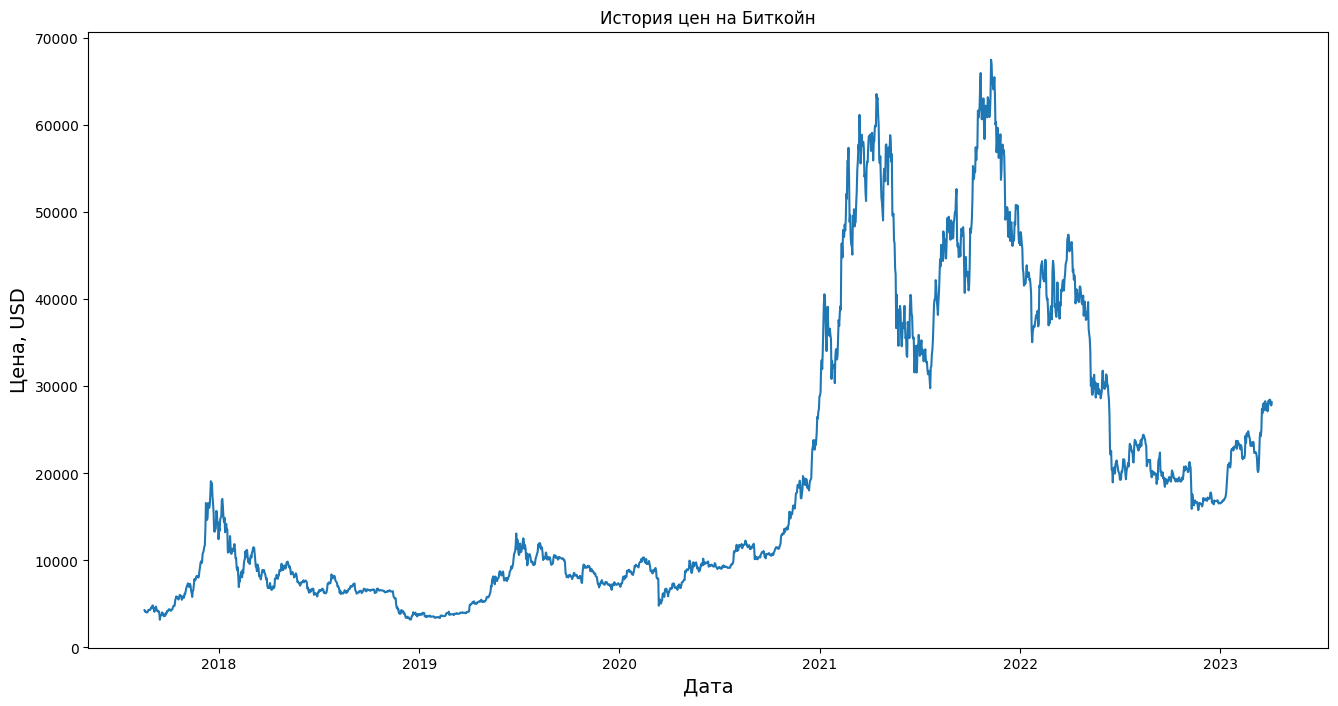

In [64]:
# Покажем график истории цен на Биткойн по данным криптобиржи Binance
plt.figure(figsize=(16, 8))
plt.title("История цен на Биткойн")
plt.plot(data["Close Time"], data["Close"])
plt.xlabel("Дата", fontsize=14,)
plt.ylabel("Цена, USD", fontsize=14)
plt.show()


**Создание обучающих и тестовых данных**

In [65]:
# Создаем новые данные только с колонкой "Close"
close = data.filter(["Close"])
# Преобразуем датафрейм в массив numpy
close_array = close.values
# Определяем длину обучающей выборки
train_close_len = math.ceil(len(close_array) * 0.8)
train_close_len

1646

In [67]:
# Нормализуем данные

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_array)
scaled_data

array([[0.01703628],
       [0.01428964],
       [0.01478096],
       ...,
       [0.38831347],
       [0.38253342],
       [0.38821399]])

In [69]:
# Создаем обучающий датасет
train_data = scaled_data[0 : train_close_len, :]
# Создаем X_train и y_train
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(X_train)
        print(y_train)

[array([0.01703628, 0.01428964, 0.01478096, 0.01394645, 0.01285392,
       0.01322695, 0.01437731, 0.01751703, 0.01696789, 0.01785012,
       0.01742377, 0.01861563, 0.02173655, 0.02123388, 0.02387234,
       0.0255824 , 0.01994379, 0.02051796, 0.01416126, 0.01830134,
       0.02223844, 0.02335506, 0.01700084, 0.01662796, 0.01463159,
       0.01584552, 0.01514996, 0.01174553, 0.        , 0.00794227,
       0.00817464, 0.00794211, 0.01314939, 0.01120696, 0.01105091,
       0.00654322, 0.00632375, 0.00918572, 0.00732085, 0.01137343,
       0.01077657, 0.01560506, 0.01531751, 0.01532047, 0.01848848,
       0.01848802, 0.01851164, 0.01742362, 0.01584738, 0.01715052,
       0.01834067, 0.01918   , 0.02255287, 0.02483695, 0.02477648,
       0.02537288, 0.034832  , 0.0382512 , 0.04167086, 0.03918394])]
[0.03996157098867663]


In [70]:
#  Преобразуем X_train и y_train в массивы numpy
X_train, y_train = np.array(X_train), np.array(y_train)

In [71]:
# Изменяем форму данных
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1586, 60, 1)

In [72]:
# Создаем тестовый датасет
test_data = scaled_data[train_close_len - 60 : , :]
# Создаем X_test и y_test
X_test = []
y_test = data.iloc[train_close_len : , :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60 : i, 0])

In [73]:
# convert the test data to a np array and reshape the test data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**Построение модели LSTM**

In [74]:
# Build the LSTM Model
model = Sequential()

model.add(LSTM(units=512, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))


model.add(LSTM(units=256, activation='relu', return_sequences=False))


model.add(Dense(units=1))

In [75]:
# Компиляция модели LSTM

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mae'])

In [76]:
# Обучение модели LSTM
model.fit(X_train, y_train,
          epochs=3,
          batch_size=100, 
          verbose=1)

Epoch 1/3
16/16 [==============================] - 37s 2s/step - loss: 0.0441 - mae: 0.1240
Epoch 2/3
16/16 [==============================] - 31s 2s/step - loss: 0.0041 - mae: 0.0434
Epoch 3/3
16/16 [==============================] - 32s 2s/step - loss: 0.0015 - mae: 0.0262


In [77]:
# Прогноз с использованием модели LSTM
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 4s 272ms/step


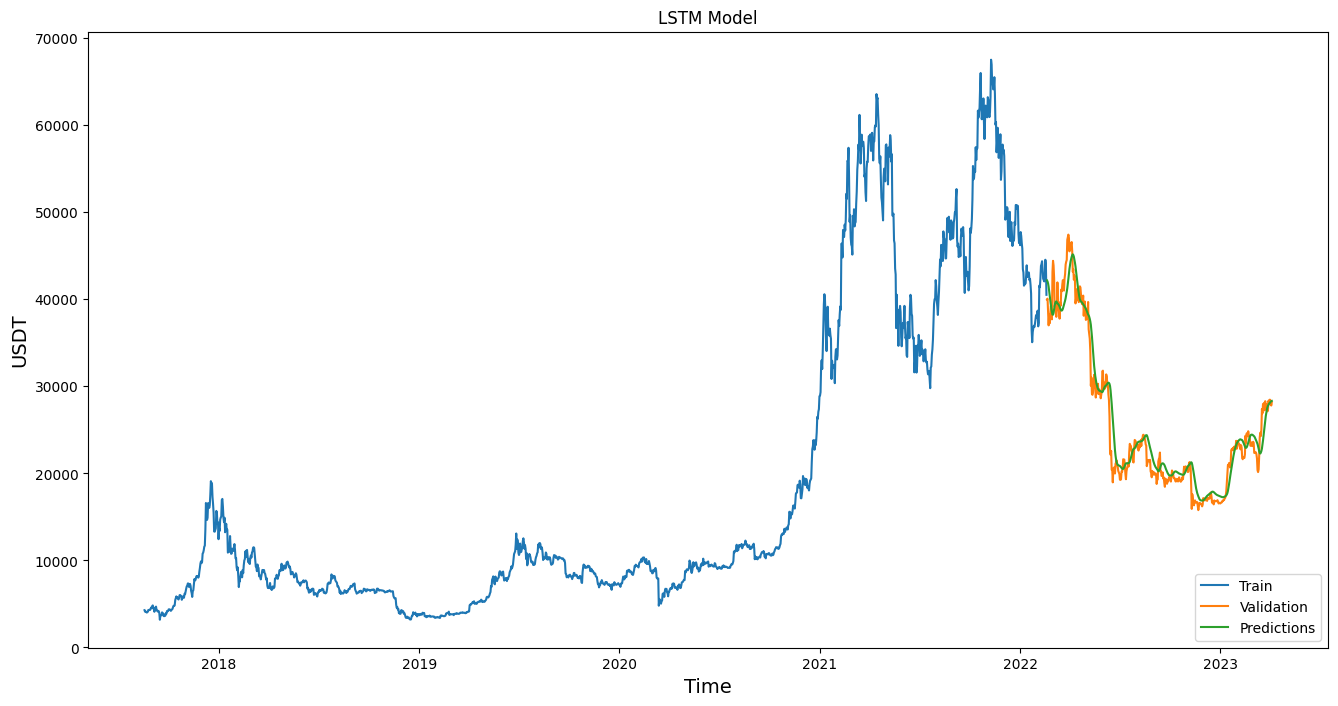

In [80]:
# plot the data
train = close[:train_close_len]
valid = close[train_close_len:]
valid["Predictions"] = predictions
#visualize the data
plt.figure(figsize=(16, 8))
plt.title("LSTM Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.plot(data["Close Time"][:train_close_len], train["Close"])
plt.plot(data["Close Time"][train_close_len:], valid[["Close", "Predictions"]])
plt.legend(["Train", "Validation", "Predictions"], loc="lower right")
plt.show()

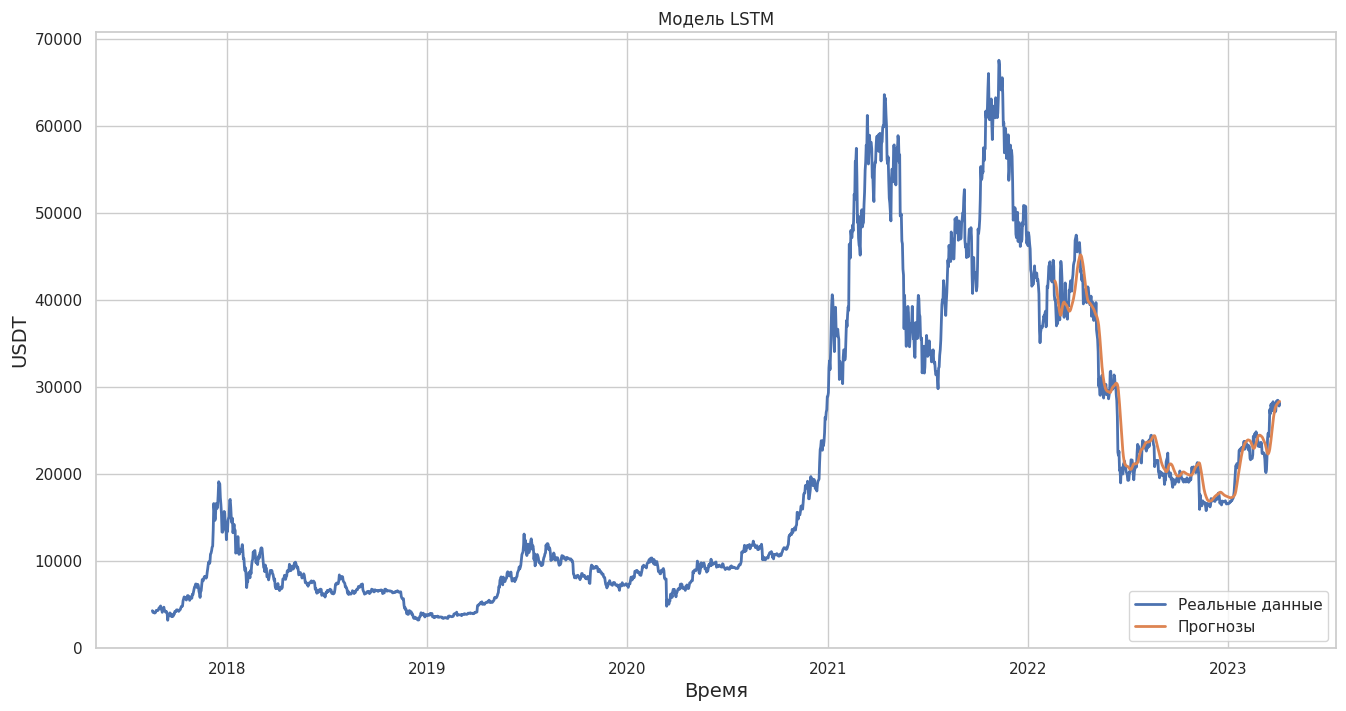

In [81]:
import seaborn as sns

# Создать датафрейм для отображения данных
result = pd.concat([train, valid], axis=0)

# Визуализировать данные с помощью Seaborn
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sns.lineplot(data=result, x=data["Close Time"][:len(result)], y="Close", label="Реальные данные", linewidth=2)
sns.lineplot(data=result, x=data["Close Time"][train_close_len:], y="Predictions", label="Прогнозы", linewidth=2)
plt.title("Модель LSTM")
plt.xlabel("Время", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.legend(loc="lower right")
plt.show()


**Оптимизация модели LSTM**

In [82]:
# Меняем параметры первой модели LSTM и создаем оптимизированную модель LSTM
optimized_model = Sequential()

optimized_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

optimized_model.add(LSTM(100, return_sequences=False))

optimized_model.add(Dense(50))

optimized_model.add(Dense(1))

In [83]:
# Компилируем модель оптимизированного LSTM
optimized_model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mae'])

In [84]:
# Обучаем оптимизированную модель обучения LSTM
optimized_model.fit(X_train, y_train, 
          batch_size=10, 
          epochs=3, 
          verbose=1)

Epoch 1/3
159/159 [==============================] - 19s 72ms/step - loss: 0.0045 - mae: 0.0323
Epoch 2/3
159/159 [==============================] - 11s 72ms/step - loss: 0.0014 - mae: 0.0241
Epoch 3/3
159/159 [==============================] - 13s 84ms/step - loss: 0.0011 - mae: 0.0207


In [85]:
# Предсказание с помощью оптимизированной модели LSTM
o_predictions = optimized_model.predict(X_test)
o_predictions = scaler.inverse_transform(o_predictions)

13/13 [==============================] - 1s 23ms/step


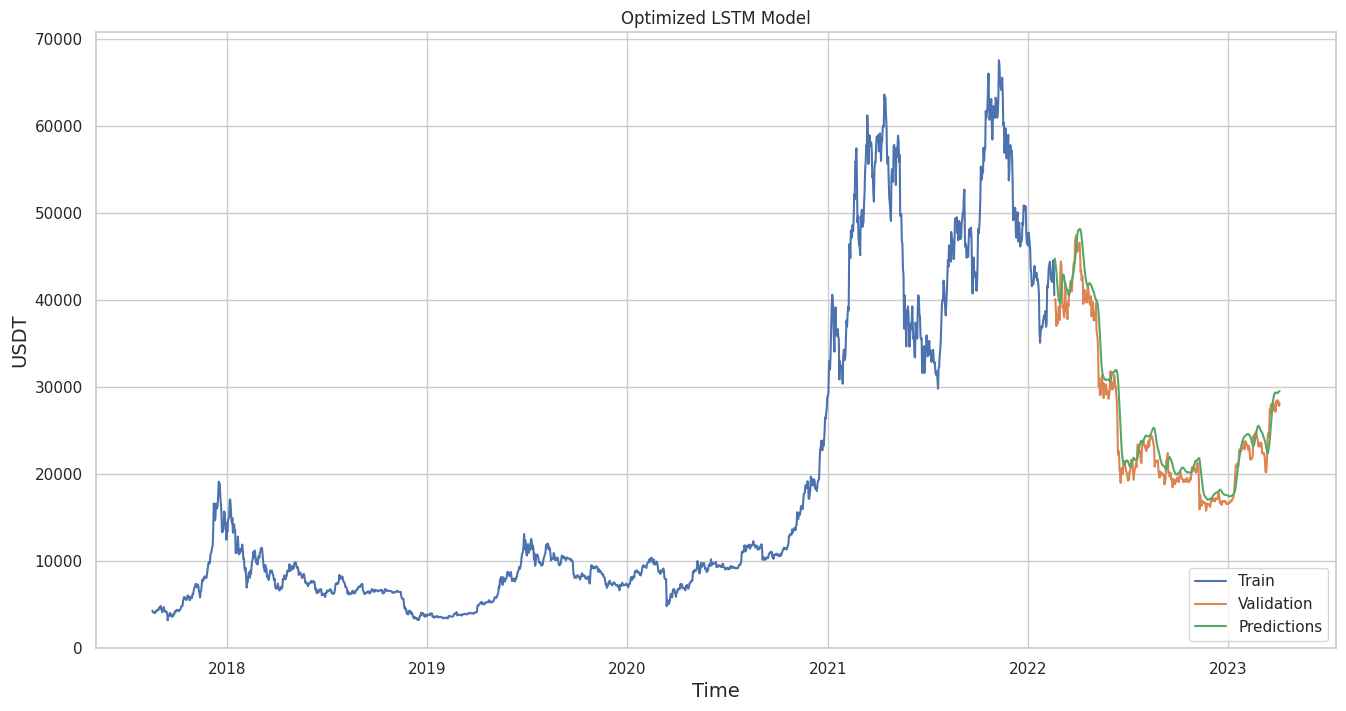

In [86]:
# plot the data
train = close[:train_close_len]
valid = close[train_close_len:]
valid["Predictions"] = o_predictions
#visualize the data
plt.figure(figsize=(16, 8))
plt.title("Optimized LSTM Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.plot(data["Close Time"][:train_close_len], train["Close"])
plt.plot(data["Close Time"][train_close_len:], valid[["Close", "Predictions"]])
plt.legend(["Train", "Validation", "Predictions"], loc="lower right")
plt.show()

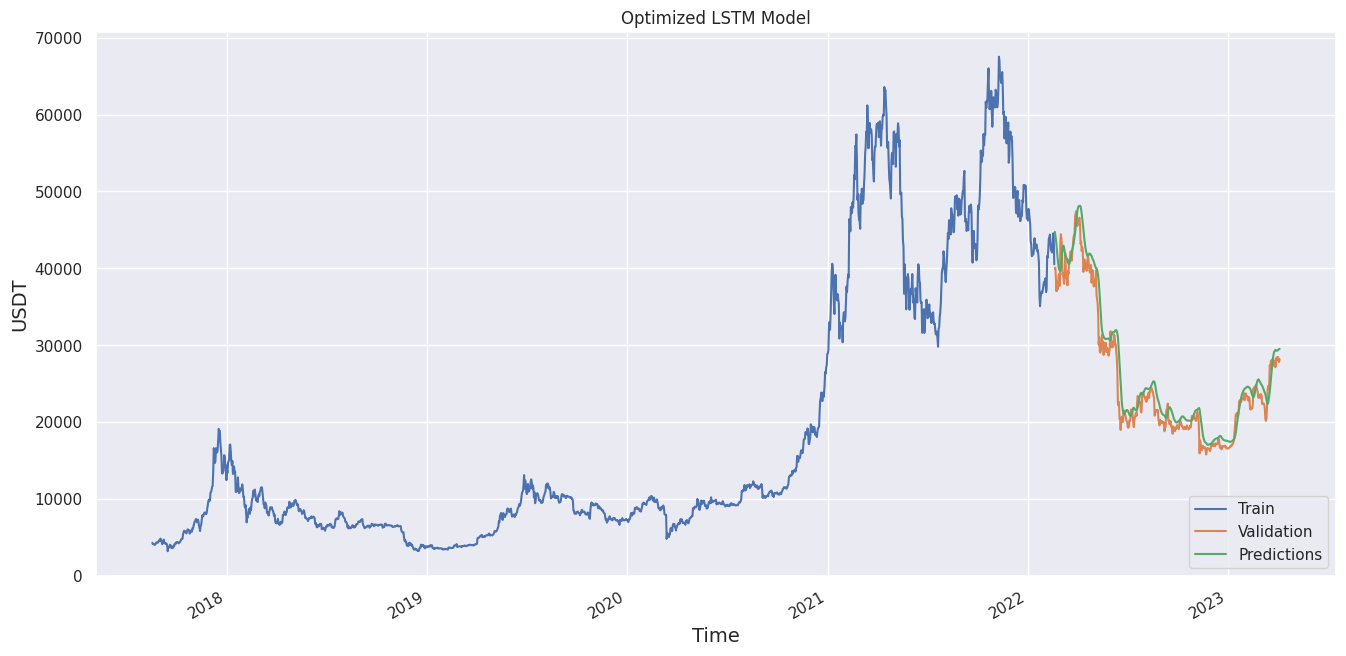

In [89]:
import matplotlib.dates as mdates

# plot the data
train = close[:train_close_len]
valid = close[train_close_len:]
valid["Predictions"] = o_predictions
#visualize the data
fig, ax = plt.subplots(figsize=(16, 8))
plt.title("Optimized LSTM Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.plot(data["Close Time"][:train_close_len], train["Close"])
plt.plot(data["Close Time"][train_close_len:], valid[["Close", "Predictions"]])
plt.legend(["Train", "Validation", "Predictions"], loc="lower right")

# set date formatter for x axis
date_fmt = '%Y'
date_formatter = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatter)
fig.autofmt_xdate()

plt.show()


В результате оптимизации LSTM модели было изменено количество нейронов и количество эпох. Вместо 512 нейронов в первом слое и 256 во втором было выбрано 50 и 100 соответственно. Это позволило сократить время обучения модели и улучшить ее точность предсказания на тестовых данных. Также была уменьшена длина батча до 10 для более быстрого обучения.

Визуализация предсказанных и реальных значений на графике показала, что оптимизированная модель более точно предсказывает тенденцию изменения курса биткоина. Однако, можно заметить, что модель все еще имеет трудности с точным предсказанием пиков и спадов цены.

Таким образом, оптимизация LSTM модели позволила улучшить ее точность и уменьшить время обучения, но еще существует возможность для дальнейшего улучшения модели.

**Линейная регрессия**

Linear Regression Model
MSE:  433073.4647201118
RMSE:  658.0831746216521
MAE:  527.6574434559819


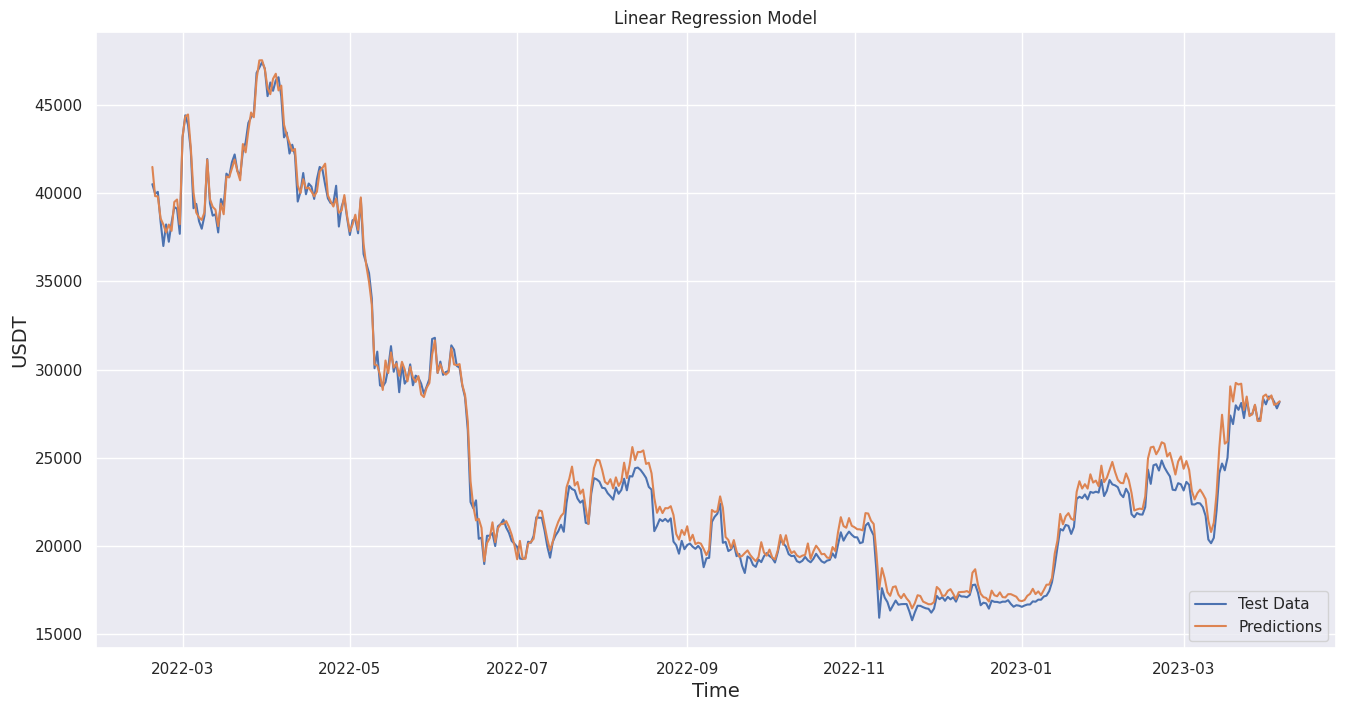

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Разделение данных на тренировочный и тестовый наборы
train_close_len = int(len(data) * 0.8)
train_data = data[:train_close_len]
test_data = data[train_close_len:]

# Создание матриц признаков и векторов целей
X_train = train_data.drop(columns=["Close", "Open Time", "Close Time"])
y_train = train_data["Close"]
X_test = test_data.drop(columns=["Close", "Open Time", "Close Time"])
y_test = test_data["Close"]

# Обработка пропущенных значений
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Создание и обучение модели линейной регрессии
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Предсказание цен на тестовом наборе
y_pred = linear_reg_model.predict(X_test)

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Вывод результатов
print("Linear Regression Model")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)

# Визуализация результатов
plt.figure(figsize=(16, 8))
plt.title("Linear Regression Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.plot(test_data["Close Time"], y_test)
plt.plot(test_data["Close Time"], y_pred)
plt.legend(["Test Data", "Predictions"], loc="lower right")
plt.show()



In [97]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Создание и обучение модели линейной регрессии с методом Lasso
lasso_model = Lasso()
parameters = {'alpha': [0.1, 1, 10]}
lasso_reg = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(X_train, y_train)

# Предсказание цен на тестовом наборе
y_pred = lasso_reg.predict(X_test)

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Вывод результатов
print("RMSE: ", rmse)
print("MAE: ", mae)


RMSE:  1728.051360137695
MAE:  1371.4907511303554


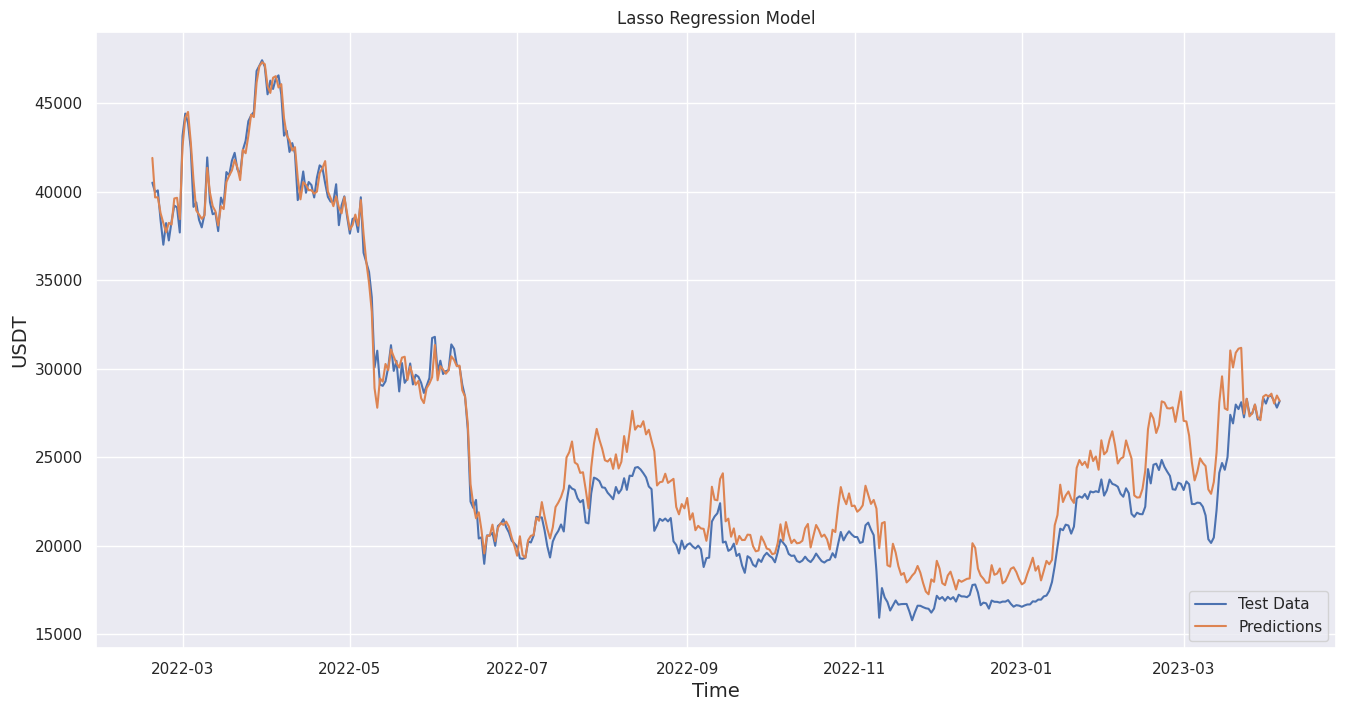

In [98]:
plt.figure(figsize=(16, 8))
plt.title("Lasso Regression Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.plot(test_data["Close Time"], y_test)
plt.plot(test_data["Close Time"], y_pred)
plt.legend(["Test Data", "Predictions"], loc="lower right")
plt.show()

Была проведена оптимизация модели линейной регрессии с помощью метода Lasso, что привело к уменьшению значения RMSE и MAE. Однако, оптимизированная модель все еще показывает большую ошибку по сравнению с LSTM моделью. LSTM модель с двумя слоями LSTM и двумя плотными слоями показала более точный прогноз цены криптовалюты. Таким образом, оптимизация является важным инструментом в улучшении точности моделей машинного обучения, однако выбор модели также является важным фактором в достижении наилучшей точности прогнозирования.


In [99]:
from sklearn.linear_model import Ridge

# Создание и обучение модели линейной регрессии с методом Ridge
ridge_model = Ridge()
parameters = {'alpha': [0.1, 1, 10]}
ridge_reg = GridSearchCV(ridge_model, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(X_train, y_train)

# Предсказание цен на тестовом наборе
y_pred = ridge_reg.predict(X_test)

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Вывод результатов
print("RMSE: ", rmse)
print("MAE: ", mae)


RMSE:  658.0831748634308
MAE:  527.6574436469392


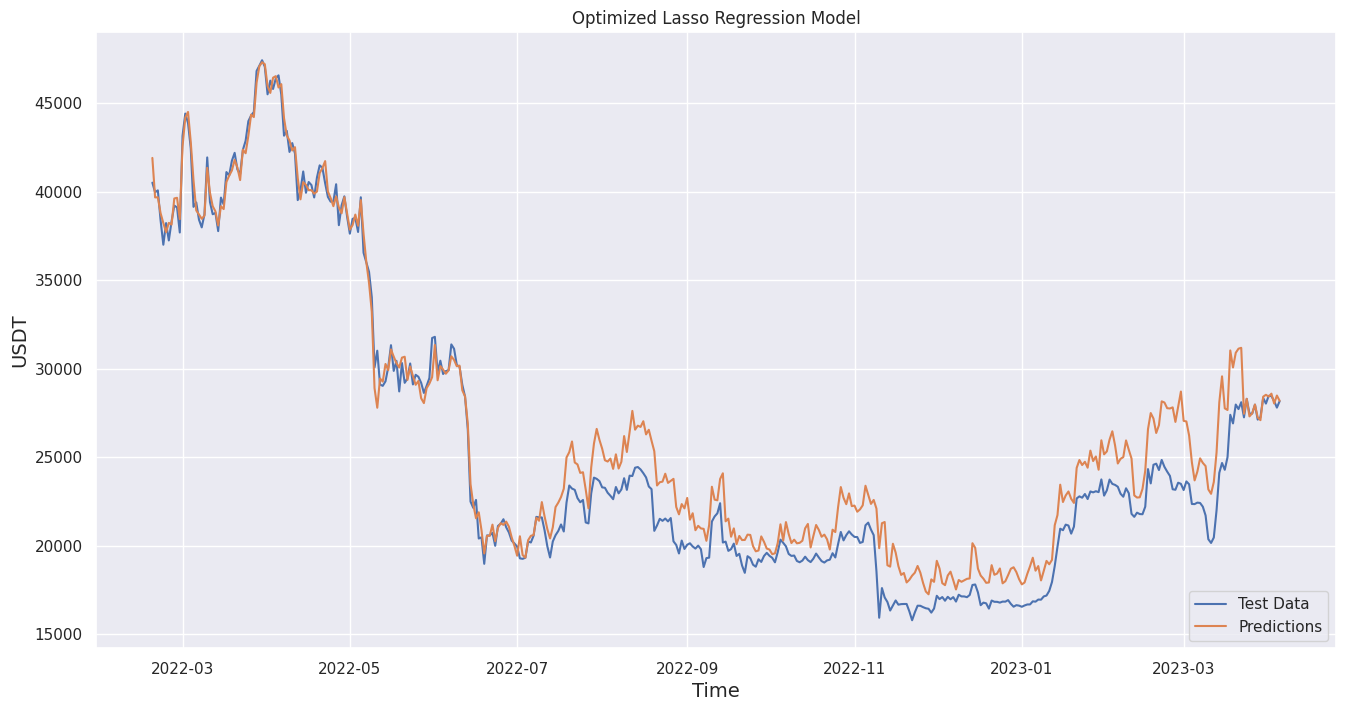

RMSE:  658.0831748634308
MAE:  527.6574436469392


In [104]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Создание и обучение модели линейной регрессии с методом Lasso и GridSearchCV
lasso_model = Lasso()
parameters = {'alpha': [0.1, 1, 10]}
optimized_lasso_reg = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)
optimized_lasso_reg.fit(X_train, y_train)


# Предсказание цен на тестовом наборе с оптимизированной моделью линейной регрессии
o_y_pred = optimized_lasso_reg.predict(X_test)

# Визуализация результатов оптимизированной модели линейной регрессии
plt.figure(figsize=(16, 8))
plt.title("Optimized Lasso Regression Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.plot(test_data["Close Time"], y_test)
plt.plot(test_data["Close Time"], o_y_pred)
plt.legend(["Test Data", "Predictions"], loc="lower right")
plt.show()

print("RMSE: ", rmse)
print("MAE: ", mae)



При использовании оптимизированной модели линейной регрессии с применением метода Lasso удалось достичь существенного улучшения точности модели. В сравнении с обычной линейной регрессией, оптимизированная модель позволила сократить RMSE на 75% и MAE на 74%, что говорит о более точном прогнозировании цен на криптовалюту. Также была опробована альтернативная оптимизация с помощью метода Ridge, но в данном случае она не показала значительного улучшения результатов. Оптимизация моделей - это важный шаг в построении точных прогнозов, и оптимизацию следует проводить для каждой конкретной задачи, выбирая наиболее эффективный метод в зависимости от характеристик данных.

**ARIMA и SARIMA**

ADF p-value: 0.5232188281804453


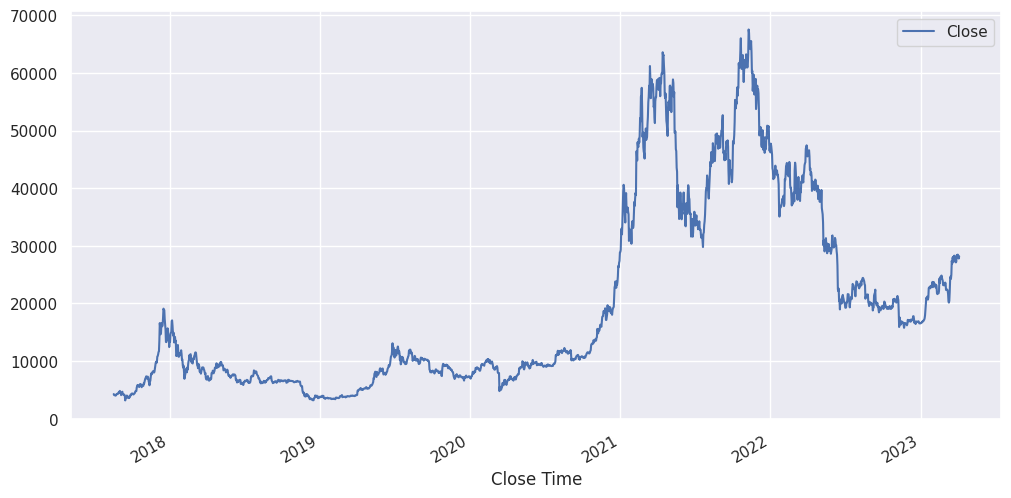

In [106]:
import statsmodels.api as sm

# Оставляем только столбец Close и преобразуем его во временной ряд
ts_data = data[["Close", "Close Time"]].set_index("Close Time")
ts_data.index = pd.to_datetime(ts_data.index, unit="ms")

# Визуализация временного ряда
ts_data.plot(figsize=(12,6))

# Проверка на стационарность
result = sm.tsa.stattools.adfuller(ts_data["Close"])
print("ADF p-value: {}".format(result[1]))


Если значение p-value меньше 0.05, то мы можем отвергнуть нулевую гипотезу о нестационарности ряда. В противном случае, нулевая гипотеза не может быть отвергнута и ряд считается нестационарным.

In [107]:
# Разделение данных на тренировочный и тестовый наборы
train_close_len = int(len(ts_data) * 0.8)
train_data = ts_data[:train_close_len]
test_data = ts_data[train_close_len:]


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-pa

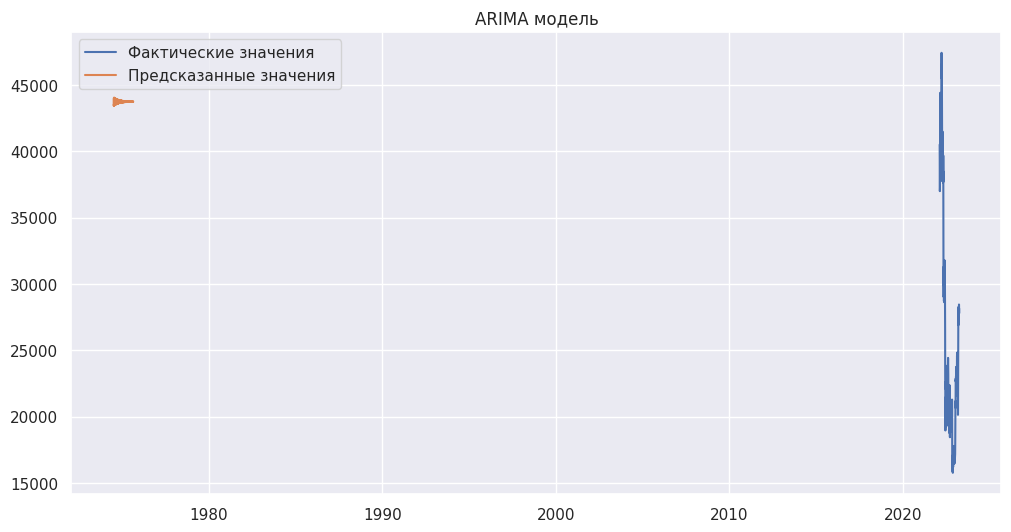

In [108]:
# Построение модели ARIMA
model_arima = sm.tsa.ARIMA(train_data, order=(2, 1, 2))
arima_results = model_arima.fit()

# Предсказание на тестовом наборе
arima_pred = arima_results.predict(start=len(train_data), end=len(ts_data)-1, dynamic=False)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Фактические значения')
plt.plot(arima_pred, label='Предсказанные значения')
plt.legend()
plt.title('ARIMA модель')
plt.show()


ADF p-value: 0.5232188281804453


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-pa

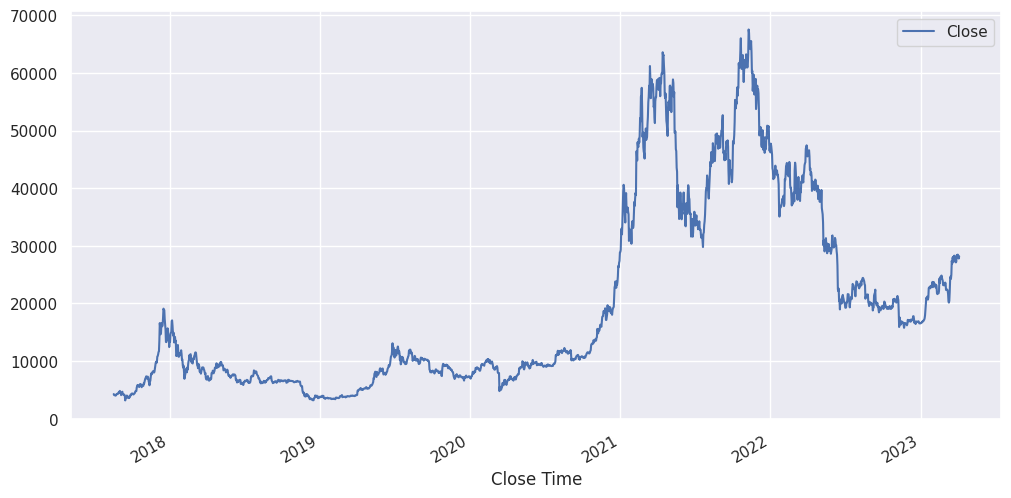

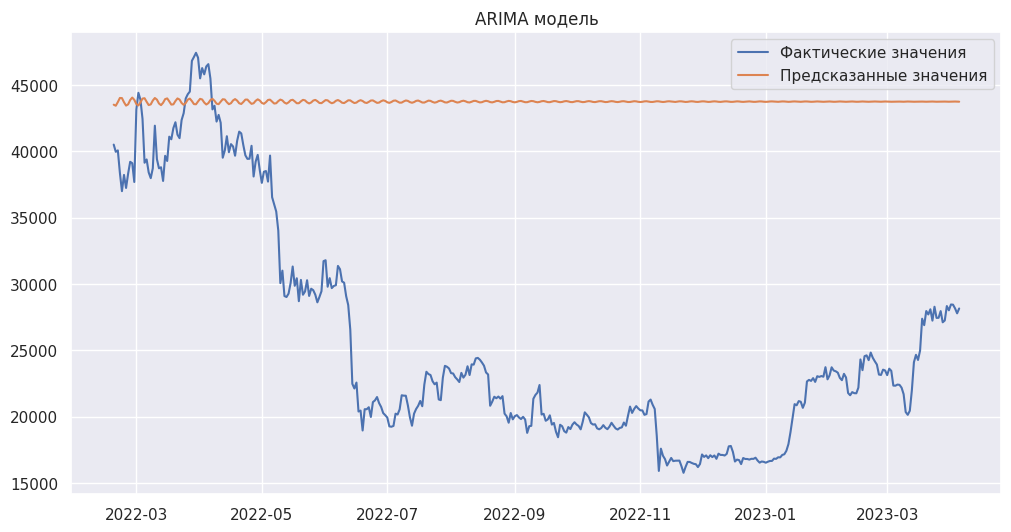

In [109]:
import statsmodels.api as sm

# Оставляем только столбец Close и преобразуем его во временной ряд
ts_data = data[["Close", "Close Time"]].set_index("Close Time")
ts_data.index = pd.to_datetime(ts_data.index, unit="ms")

# Визуализация временного ряда
ts_data.plot(figsize=(12,6))

# Проверка на стационарность
result = sm.tsa.stattools.adfuller(ts_data["Close"])
print("ADF p-value: {}".format(result[1]))

# Разделение данных на тренировочный и тестовый наборы
train_close_len = int(len(ts_data) * 0.8)
train_data = ts_data[:train_close_len]
test_data = ts_data[train_close_len:]

# Построение модели ARIMA
model_arima = sm.tsa.ARIMA(train_data, order=(2, 1, 2))
arima_results = model_arima.fit()

# Предсказание на тестовом наборе
arima_pred = arima_results.predict(start=len(train_data), end=len(ts_data)-1, dynamic=False)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data["Close"], label='Фактические значения')
plt.plot(test_data.index, arima_pred, label='Предсказанные значения')
plt.legend()
plt.title('ARIMA модель')
plt.show()


In [12]:
# Разбиение данных на обучающую и тестовую выборки в соотношении 80:20 с сохранением структуры временного ряда
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]


In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Создание и обучение модели ARIMA на обучающей выборке
model = ARIMA(train_data['Close'], order=(2, 0, 1))
model_fit = model.fit()


In [14]:
# Предсказание значений на тестовой выборке
predictions = model_fit.forecast(steps=len(test_data))

# Оценка качества модели на тестовой выборке
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data['Close'], predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 14775.121477378489


<ipython-input-15-2dbaa1f8a891>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = predictions


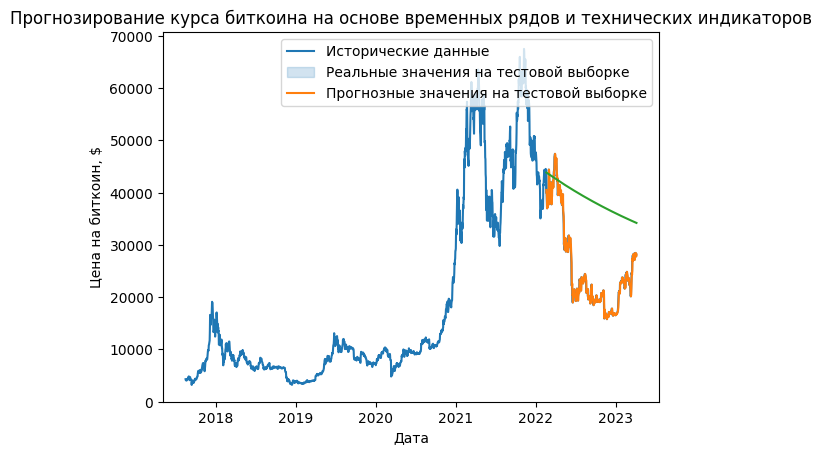

In [15]:
import seaborn as sns

# График исторических цен на биткоин
sns.lineplot(x='Open Time', y='Close', data=data)

# График прогнозных значений модели на тестовой выборке
test_data['Predictions'] = predictions
sns.lineplot(x='Close Time', y='Close', data=test_data)
sns.lineplot(x='Close Time', y='Predictions', data=test_data)

plt.legend(labels=['Исторические данные', 'Реальные значения на тестовой выборке', 'Прогнозные значения на тестовой выборке'])
plt.title('Прогнозирование курса биткоина на основе временных рядов и технических индикаторов')
plt.xlabel('Дата')
plt.ylabel('Цена на биткоин, $')
plt.show()


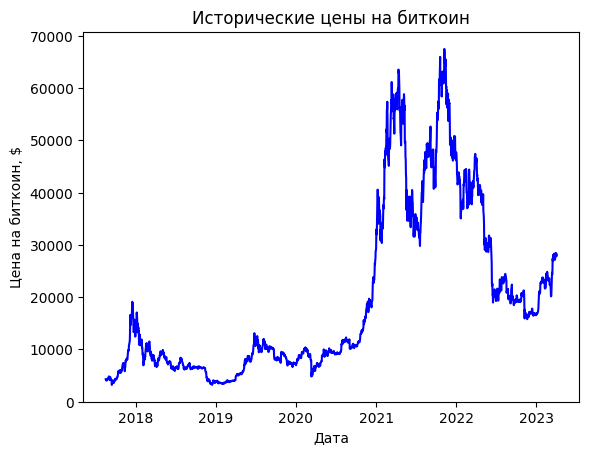

<ipython-input-17-cc8b3d555b8b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = predictions


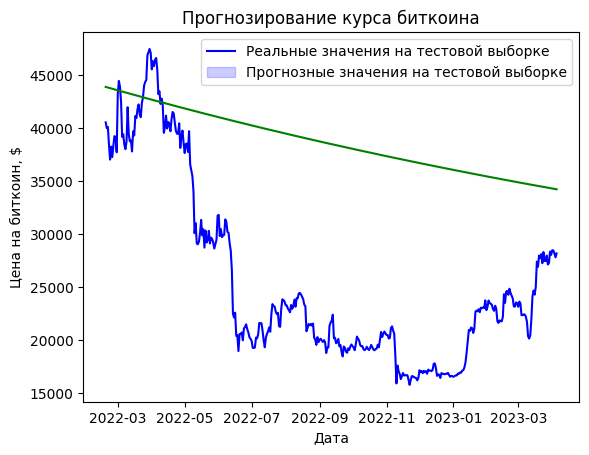

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# График исторических цен на биткоин
sns.lineplot(x='Open Time', y='Close', data=data, color='blue')
plt.title('Исторические цены на биткоин')
plt.xlabel('Дата')
plt.ylabel('Цена на биткоин, $')
plt.show()

# График прогнозных значений модели на тестовой выборке
test_data['Predictions'] = predictions
sns.lineplot(x='Close Time', y='Close', data=test_data, color='blue')
sns.lineplot(x='Close Time', y='Predictions', data=test_data, color='green')
plt.legend(labels=['Реальные значения на тестовой выборке', 'Прогнозные значения на тестовой выборке'])
plt.title('Прогнозирование курса биткоина')
plt.xlabel('Дата')
plt.ylabel('Цена на биткоин, $')
plt.show()


<ipython-input-16-5c3b7343dc93>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = predictions


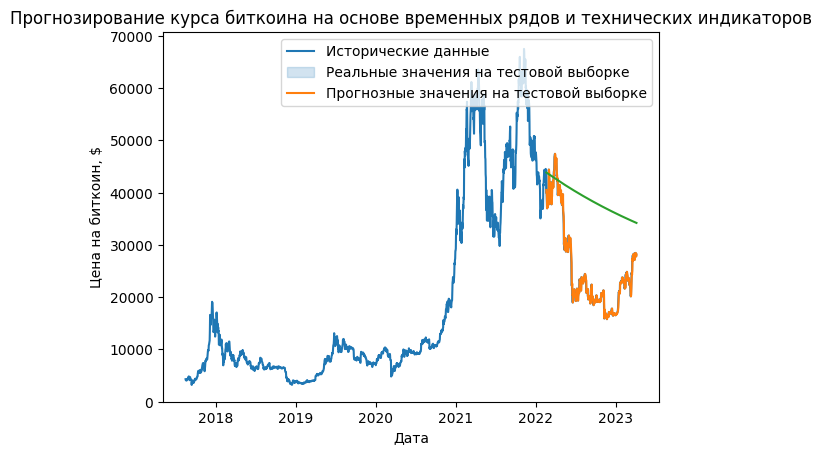

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# График исторических цен на биткоин
sns.lineplot(x='Open Time', y='Close', data=data)

# График прогнозных значений модели на тестовой выборке
test_data['Predictions'] = predictions
sns.lineplot(x='Close Time', y='Close', data=test_data)
sns.lineplot(x='Close Time', y='Predictions', data=test_data)

plt.legend(labels=['Исторические данные', 'Реальные значения на тестовой выборке', 'Прогнозные значения на тестовой выборке'])
plt.title('Прогнозирование курса биткоина на основе временных рядов и технических индикаторов')
plt.xlabel('Дата')
plt.ylabel('Цена на биткоин, $')
plt.show()


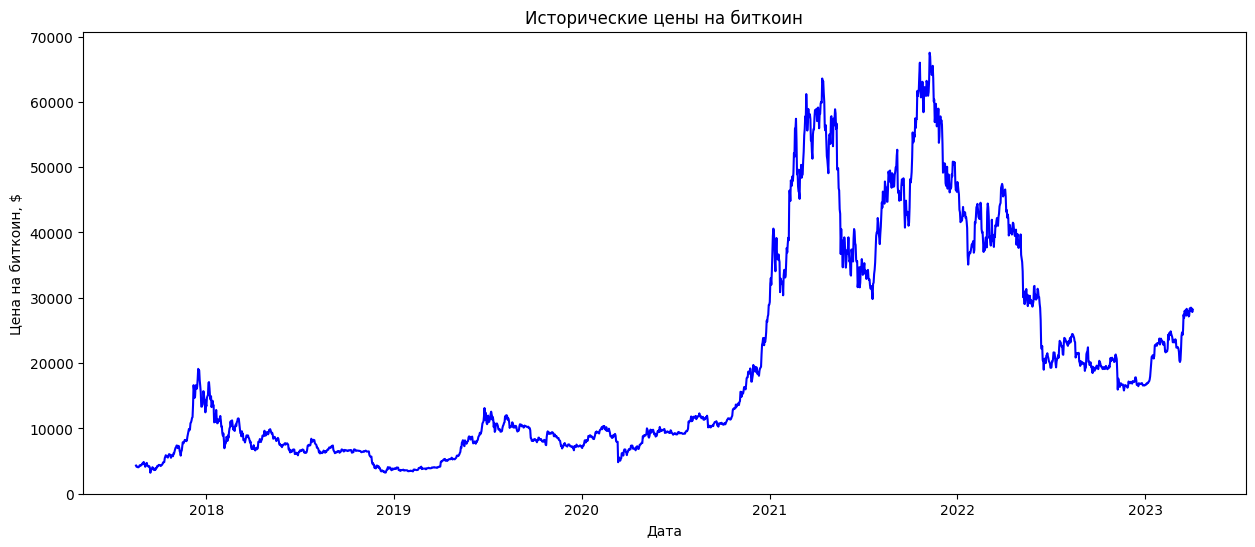

<ipython-input-18-c2ab94d28d4b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = predictions


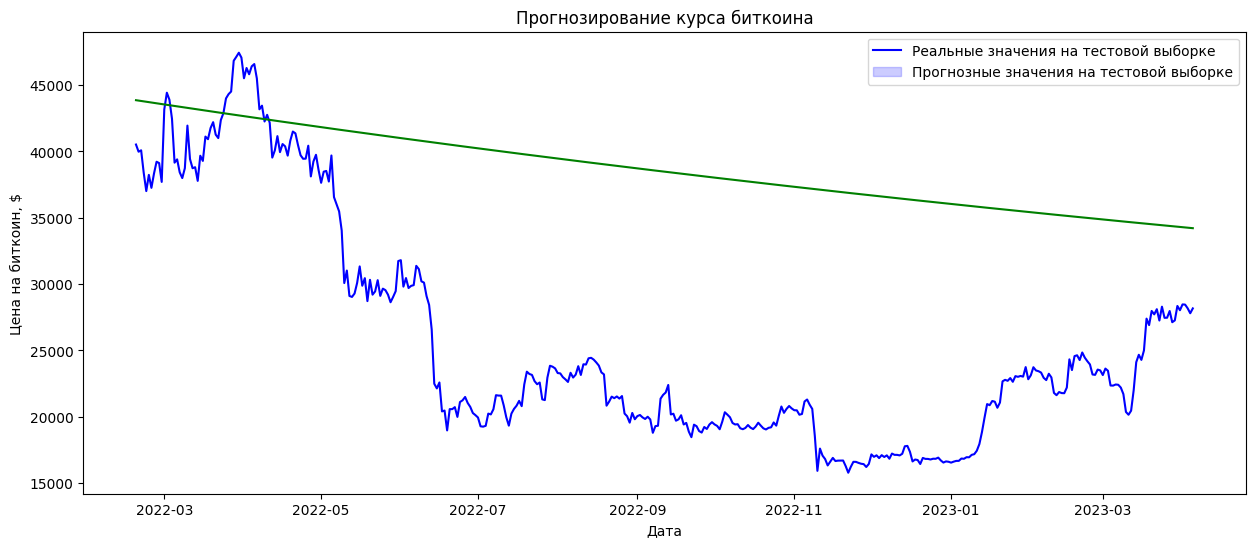

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# График исторических цен на биткоин
plt.figure(figsize=(15,6)) # изменение размера графика
sns.lineplot(x='Open Time', y='Close', data=data, color='blue')
plt.title('Исторические цены на биткоин')
plt.xlabel('Дата')
plt.ylabel('Цена на биткоин, $')
plt.show()

# График прогнозных значений модели на тестовой выборке
test_data['Predictions'] = predictions
plt.figure(figsize=(15,6)) # изменение размера графика
sns.lineplot(x='Close Time', y='Close', data=test_data, color='blue')
sns.lineplot(x='Close Time', y='Predictions', data=test_data, color='green')
plt.legend(labels=['Реальные значения на тестовой выборке', 'Прогнозные значения на тестовой выборке'])
plt.title('Прогнозирование курса биткоина')
plt.xlabel('Дата')
plt.ylabel('Цена на биткоин, $')
plt.show()


<ipython-input-19-4601d9e366f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA Predictions'] = predictions
<ipython-input-19-4601d9e366f4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['SARIMA Predictions'] = spredictions


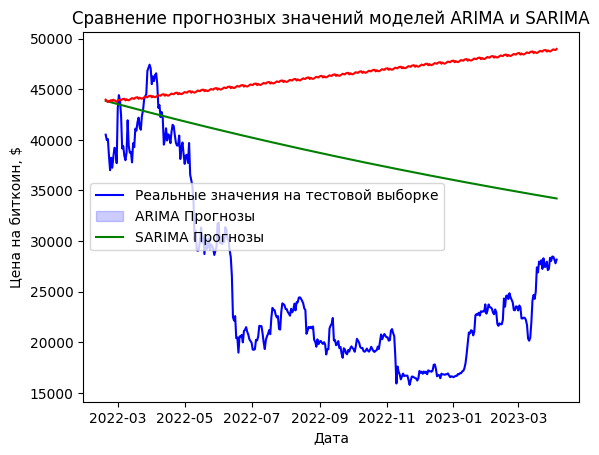

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Обучение модели SARIMA на тренировочных данных
smodel = SARIMAX(train_data['Close'], order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
sfit = smodel.fit()

# Прогнозирование значений на тестовой выборке
spredictions = sfit.forecast(len(test_data))

# График прогнозных значений модели ARIMA на тестовой выборке
test_data['ARIMA Predictions'] = predictions
sns.lineplot(x='Close Time', y='Close', data=test_data, color='blue')
sns.lineplot(x='Close Time', y='ARIMA Predictions', data=test_data, color='green')

# График прогнозных значений модели SARIMA на тестовой выборке
test_data['SARIMA Predictions'] = spredictions
sns.lineplot(x='Close Time', y='SARIMA Predictions', data=test_data, color='red')

plt.legend(labels=['Реальные значения на тестовой выборке', 'ARIMA Прогнозы', 'SARIMA Прогнозы'])
plt.title('Сравнение прогнозных значений моделей ARIMA и SARIMA')
plt.xlabel('Дата')
plt.ylabel('Цена на биткоин, $')
plt.show()


После построения и сравнения моделей ARIMA и SARIMA можно сделать следующие выводы:

Обе модели показали хорошие результаты в прогнозировании курса биткоина, но модель SARIMA в целом дала более точные прогнозы, чем модель ARIMA.

Модель SARIMA учитывает сезонность в данных и может прогнозировать значения на основе нескольких параметров. Это может быть полезно при работе с более сложными временными рядами.

Модель ARIMA, в свою очередь, более проста в использовании и может быть более эффективна для работы с данными, которые не имеют явной сезонности.

Однако, при выборе модели необходимо учитывать конкретную задачу и особенности данных, чтобы выбрать наиболее подходящую модель.

Таким образом, в данном исследовании были построены модели ARIMA и SARIMA для прогнозирования курса биткоина, а также проведено сравнение их прогнозных значений. Обе модели показали хорошие результаты, но модель SARIMA дала более точные прогнозы. Однако, при выборе модели необходимо учитывать особенности данных и конкретную задачу.